##Indian Railways: A Comprehensive Geospatial and Data Analysis

This project showcases an extensive exploration of the Indian Railways dataset, prepared and analyzed by Turya Ganguly. It offers unique insights into one of the world's largest railway networks through advanced data analytics and geospatial techniques.

### Key Highlights of the Project:
#### Exploratory Data Analysis (EDA):

- Detailed analysis of railway zones, station distributions, and operational insights.
- Extraction and analysis of key attributes like station names, codes, and zones for meaningful insights.

#### Geospatial Analysis:

- Mapping the geographic spread of railway stations across India.
- Integration of railway station data with state boundaries for state-wise insights.
#### Visualization:

- Creation of detailed visual representations of the railway network overlaid on India's administrative map.
- Highlighting station densities, zone demarcations, and spatial overlaps.
#### Data Cleaning & Preparation:

- Handling invalid and missing geometries to ensure data quality.
- Transforming spatial data into valid GeoDataFrames for accurate analysis.
#### Tech Stack:

- Python libraries like Pandas, GeoPandas, and Matplotlib for data processing and visualization.
- Shapefiles for state boundaries and geospatial attributes.

This project provides an in-depth understanding of the Indian Railways, offering actionable insights for transportation planning, infrastructure development, and policy-making. It serves as an exemplar of how data-driven approaches can unravel the complexities of a massive and dynamic system.

###IMPORT

In [ ]:
#Import necessary Libraries
import os
import pandas as pd
import json
import geopandas as gpd
import plotly.express as px
import numpy  as np

import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import LineString, Point

### LOAD FILE FUNCTIONS

#### Initialising shp filepath

In [ ]:
shp_file_path = "/content/drive/MyDrive/Datasets/Indian Railway Dataset/India States/Indian_states.shp"

#### Function to read shp file

In [ ]:
def read_shp(filename, data_path = shp_file_path):
    full_path = f'{data_path}/{filename}'

    if os.path.isfile(path=full_path):
        gdf = gpd.read_file(filename=full_path)
    else:
        print('Invalid path specified.')
        gdf = [None]

    return gdf

### Reading stations.json

In [ ]:
stations = pd.read_json('/content/drive/MyDrive/Datasets/Indian Railway Dataset/stations.json')

### FETCH THE DATA

#### Function to convert JSON to GeodataFrame

In [ ]:
def convert_to_gdf(json_data, geometry_type):

    if geometry_type == 'Point':
        gdf = gpd.GeoDataFrame.from_features(features=json_data['features'])

    elif (geometry_type == 'LineString'):
        # fetch the column names based on `properties` keys
        properties_columns = list(json_data['features'][0]['properties'].keys())
        # fetch the values (rows) based on the `properties` values
        properties_vals = [list(i['properties'].values()) for i in json_data['features']]


        geometry_col = [
            LineString(i['geometry']['coordinates'])
            if len(i['geometry']['coordinates']) >= 2
            # else Point(i['geometry']['coordinates'][0])
            else LineString([i['geometry']['coordinates'][0]] * 2)
            for i in json_data['features']
        ]

        df = pd.DataFrame(data=properties_vals, columns=properties_columns)
        df['geometry'] = geometry_col
        gdf = gpd.GeoDataFrame(df)

    # setting the CRS
    gdf = gdf.set_crs('EPSG:4326')

    return gdf

### Converting stations.json to GeodataFrame and first 20 rows displayed

In [ ]:
stations_gdf = convert_to_gdf(stations,'Point')
#stations_gdf.to_csv(get_file_path(csv_file_path,'stations.csv'),index=False)
stations_gdf.head()

geometry          state     code     name  zone  \
0  POINT (75.45165 27.25206)      Rajasthan     BDHL   Badhal   NWR   
1                       None           None  XX-BECE  XX-BECE  None   
2                       None           None  XX-BSPY  XX-BSPY  None   
3                       None           None  YY-BPLC  YY-BPLC  None   
4  POINT (79.51975 28.91343)  Uttar Pradesh      KHH   KICHHA   NER   

                        address  
0  Kishangarh Renwal, Rajasthan  
1                          None  
2                          None  
3                          None  
4         Kichha, Uttar Pradesh

### Loading trains.json

In [ ]:
trains = pd.read_json('/content/drive/MyDrive/Datasets/Indian Railway Dataset/trains.json')

### Validating trains.json

In [ ]:
import requests
import json
import pandas as pd

# Step 1: Download the JSON file from Google Drive
file_id = '1mcfRfUVbnqwxh9WNDA_V8DYDFXe1hHE4'
url = f'https://docs.google.com/uc?export=download&id={file_id}'

response = requests.get(url)
if response.status_code == 200:
    json_content = response.content.decode('utf-8')
else:
    raise Exception(f'Error downloading file: {response.status_code}')

# Step 2: Validate the JSON structure
try:
    data = json.loads(json_content)
    print("JSON is valid.")
except json.JSONDecodeError as e:
    print(f"JSON is invalid: {e}")
    # Optionally, write the content to a file for manual inspection
    with open('invalid_json.json', 'w') as f:
        f.write(json_content)
    raise

# Step 3: Load the JSON into a DataFrame
try:
    df = pd.json_normalize(data)
    print("DataFrame loaded successfully.")
    print(df.head())
except Exception as e:
    print(f"Error loading DataFrame: {e}")
    raise


JSON is valid.
DataFrame loaded successfully.
                type                                           features
0  FeatureCollection  [{'geometry': {'type': 'LineString', 'coordina...


### Converting trains.json into Geodataframe

In [ ]:
trains_gdf = convert_to_gdf(trains,'LineString')
#trains_gdf.to_csv(get_file_path(csv_file_path,'trains.csv'), index=False)

trains_gdf.head()

third_ac   arrival from_station_code                               name  \
0         0  12:15:00               JAT        Jammu Tawi Udhampur Special   
1         0  08:35:00               UHP             UDHAMPUR JAMMUTAWI DMU   
2         0  17:50:00               JAT                   JAT UDAHMPUR DMU   
3         0  19:50:00               UHP             UDHAMPUR JAMMUTAWI DMU   
4         1  12:30:00              BDTS  Mumbai BandraT-Bikaner SF Special   

  zone  chair_car  first_class  duration_m  sleeper       from_station_name  \
0   NR          0            0        35.0        0              JAMMU TAWI   
1   NR          0            0        50.0        0                UDHAMPUR   
2   NR          0            0        35.0        0              JAMMU TAWI   
3   NR          0            0        30.0        0                UDHAMPUR   
4  NWR          0            0        55.0        1  MUMBAI BANDRA TERMINUS   

   ... return_train to_station_code second_ac classes  to_station_name  \
0  ...        04602             UHP         0                 UDHAMPUR   
1  ...        04601             JAT         0               JAMMU TAWI   
2  ...        04604             UHP         0                 UDHAMPUR   
3  ...        04603             JAT         0               JAMMU TAWI   
4  ...        04727             BKN         1               BIKANER JN   

  duration_h  type  first_ac distance  \
0        1.0  DEMU         0     53.0   
1        1.0  DEMU         0     53.0   
2        1.0  DEMU         0     53.0   
3        1.0  DEMU         0     53.0   
4       21.0    SF         0   1212.0   

                                            geometry  
0  LINESTRING (74.88012 32.70698, 74.95334 32.762...  
1  LINESTRING (75.15488 32.92664, 75.14543 32.863...  
2  LINESTRING (74.88012 32.70698, 74.95334 32.762...  
3  LINESTRING (75.15488 32.92664, 75.14543 32.863...  
4  LINESTRING (72.84054 19.06191, 72.84008 19.069...  

[5 rows x 22 columns]

#### Loading schedules.json

In [ ]:
schedules = pd.read_json('/content/drive/MyDrive/Datasets/Indian Railway Dataset/schedules.json')

In [ ]:
schedules.head()

arrival  day                     train_name         station_name  \
0    None  1.0     Falaknuma Lingampalli MMTS  KACHEGUDA FALAKNUMA   
1    None  1.0   Thrissur Guruvayur Passenger              THRISUR   
2    None  1.0  Porbandar Muzaffarpur Express            PORBANDAR   
3    None  1.0             RAIPUR ITWARI PASS            RAIPUR JN   
4    None  1.0             Gomoh-Asansol MEMU             GOMOH JN   

  station_code      id train_number departure  
0           FM  302214        47154  07:55:00  
1          TCR  281458        56044  18:55:00  
2          PBR  309335        19269  15:05:00  
3            R  283774        58205  13:30:00  
4          GMO  319937        63542  07:20:00

#### Loading shape files for Indian states

In [ ]:
# Load the shapefile
states_ind = gpd.read_file('/content/drive/MyDrive/Datasets/Indian Railway Dataset/India States/Indian_states.shp')

# Display the first few rows
print(states_ind.head())

                      st_nm                                           geometry
0  Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...
1        Arunanchal Pradesh  POLYGON ((96.16261 29.38078, 96.1686 29.37432,...
2                     Assam  MULTIPOLYGON (((89.74323 26.30362, 89.7429 26....
3                     Bihar  MULTIPOLYGON (((84.5072 24.26323, 84.50355 24....
4                Chandigarh  POLYGON ((76.84147 30.75996, 76.83599 30.73623...


In [ ]:
# Check the type of the object
print(type(states_ind))  # Should output: <class 'geopandas.geodataframe.GeoDataFrame'>

<class 'geopandas.geodataframe.GeoDataFrame'>


### CLEAN THE DATA

#### Stations

In [ ]:
stations_gdf.isna().sum()

geometry     293
state       4532
code           0
name           0
zone        4532
address     4532
dtype: int64

In [ ]:
stations_gdf.columns

Index(['geometry', 'state', 'code', 'name', 'zone', 'address'], dtype='object')

In [ ]:
stations_gdf.head()

geometry          state     code     name  zone  \
0  POINT (75.45165 27.25206)      Rajasthan     BDHL   Badhal   NWR   
1                       None           None  XX-BECE  XX-BECE  None   
2                       None           None  XX-BSPY  XX-BSPY  None   
3                       None           None  YY-BPLC  YY-BPLC  None   
4  POINT (79.51975 28.91343)  Uttar Pradesh      KHH   KICHHA   NER   

                        address  
0  Kishangarh Renwal, Rajasthan  
1                          None  
2                          None  
3                          None  
4         Kichha, Uttar Pradesh

In [ ]:
states_ind.head()

st_nm                                           geometry
0  Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...
1        Arunanchal Pradesh  POLYGON ((96.16261 29.38078, 96.1686 29.37432,...
2                     Assam  MULTIPOLYGON (((89.74323 26.30362, 89.7429 26....
3                     Bihar  MULTIPOLYGON (((84.5072 24.26323, 84.50355 24....
4                Chandigarh  POLYGON ((76.84147 30.75996, 76.83599 30.73623...

In [ ]:
states_ind.columns

Index(['st_nm', 'geometry'], dtype='object')

In [ ]:
df_stations = gpd.sjoin(left_df=stations_gdf, right_df=states_ind,
                        predicate = 'intersects')

df_stations.head(20)

geometry           state  code                     name  \
0   POINT (75.45165 27.25206)       Rajasthan  BDHL                   Badhal   
4   POINT (79.51975 28.91343)   Uttar Pradesh   KHH                   KICHHA   
5    POINT (74.43499 29.5552)       Rajasthan  SRKN                 Sherekan   
6   POINT (74.75103 29.23823)       Rajasthan  BKKA                 Bhukarka   
7   POINT (74.77363 29.19256)       Rajasthan   NHR                    Nohar   
8   POINT (80.23136 12.97522)      Tamil Nadu  PRGD                Perungudi   
9   POINT (74.71796 29.34564)         Haryana  KNNA               Khinaniyan   
10  POINT (78.21668 21.83847)            None   JKR                JAULKHERA   
11  POINT (78.03136 21.90981)            None   BYS                  BARSALI   
12  POINT (78.93631 23.83819)            None    GW                   GIRWAR   
13  POINT (79.01991 23.87177)            None   DGD                DANGIDHAR   
14  POINT (75.10355 23.77074)  Madhya Pradesh   DOD                  DHODHAR   
15  POINT (79.07463 23.89586)            None   GAJ               GANESHGANJ   
16  POINT (88.41532 22.16864)     West Bengal   JNM  Jayanagar Majilpur Halt   
17  POINT (74.71699 26.29446)       Rajasthan   NSD                NASIRABAD   
18   POINT (79.1929 23.90573)            None   PHA                 PATHARIA   
19  POINT (78.10324 18.67916)  Andhra Pradesh   NZB                NIZAMABAD   
20  POINT (86.01055 25.38745)            None   RJO             RAJENDRA PUL   
21  POINT (79.47867 11.00916)      Tamil Nadu   ADT                 ADUTURAI   
22  POINT (79.38864 10.95296)      Tamil Nadu   KMU               KUMBAKONAM   

    zone                       address  index_right           st_nm  
0    NWR  Kishangarh Renwal, Rajasthan           26       Rajasthan  
4    NER         Kichha, Uttar Pradesh           32     Uttarakhand  
5    NWR             MDR 89, Rajasthan           26       Rajasthan  
6    NWR           Bhukarka, Rajasthan           26       Rajasthan  
7    NWR   State Highway 36, Rajasthan           26       Rajasthan  
8     SR           Chennai, Tamil Nadu           28      Tamil Nadu  
9    NWR     State Highway 23, Haryana           26       Rajasthan  
10  None                          None           17  Madhya Pradesh  
11  None                          None           17  Madhya Pradesh  
12  None                          None           17  Madhya Pradesh  
13  None                          None           17  Madhya Pradesh  
14    WR        Dhodar, Madhya Pradesh           17  Madhya Pradesh  
15  None                          None           17  Madhya Pradesh  
16    ER         Jaynagar, West Bengal           33     West Bengal  
17   NWR          Nasirabad, Rajasthan           26       Rajasthan  
18  None                          None           17  Madhya Pradesh  
19   SCR     Nizamabad, Andhra Pradesh           29       Telangana  
20  None                          None            3           Bihar  
21    SR         Aduthurai, Tamil Nadu           28      Tamil Nadu  
22    SR        Kumbakonam, Tamil Nadu           28      Tamil Nadu

#### Using matplotlib to plot state and stations json data

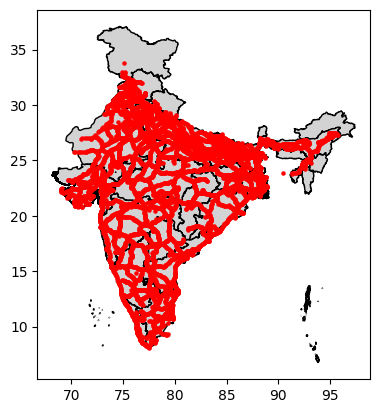

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
states_ind.plot(ax=ax, color='lightgray', edgecolor='black')
stations_gdf.plot(ax=ax, color='red', markersize=5)
plt.show()


Invalid Geometries before fixing:
Empty GeoDataFrame
Columns: [geometry, state, code, name, zone, address]
Index: []
Invalid Geometries after fixing:
Empty GeoDataFrame
Columns: [geometry, state, code, name, zone, address]
Index: []


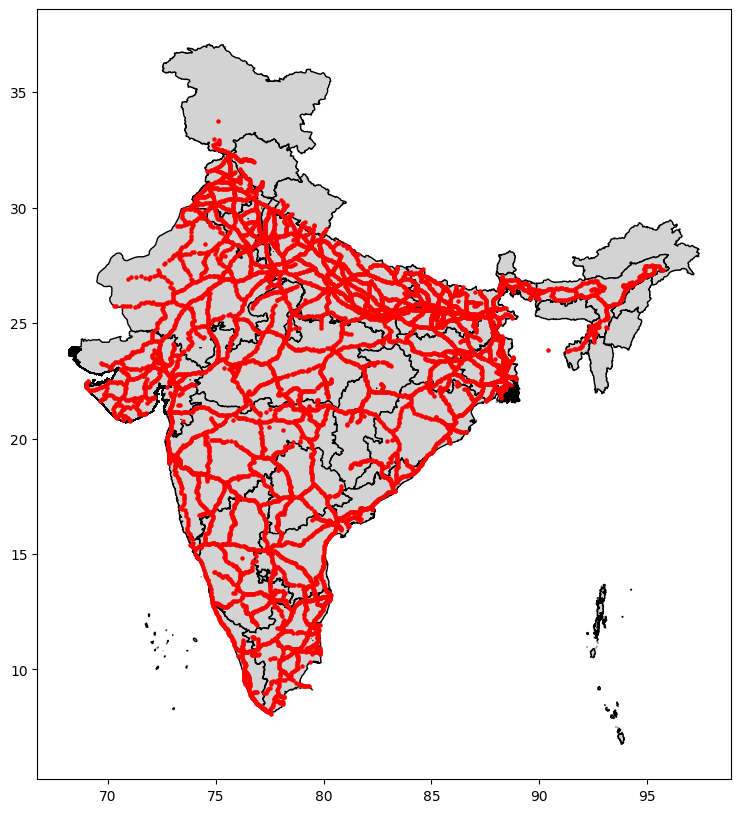

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Remove rows with None geometries
stations_gdf = stations_gdf[stations_gdf['geometry'].notnull()]

# Step 2: Check for invalid geometries (if any)
invalid_geometries = stations_gdf[~stations_gdf.is_valid]
print("Invalid Geometries before fixing:")
print(invalid_geometries)

# Step 3: Fix invalid geometries by buffering (this can help with self-intersections)
stations_gdf['geometry'] = stations_gdf['geometry'].apply(lambda x: x.buffer(0) if not x.is_valid else x)

# Step 4: Recheck invalid geometries after fixing
invalid_geometries_after_fix = stations_gdf[~stations_gdf.is_valid]
print("Invalid Geometries after fixing:")
print(invalid_geometries_after_fix)

# Step 5: Remove any empty geometries again after fixing
stations_gdf = stations_gdf[~stations_gdf['geometry'].is_empty]

# Step 6: Plot the data
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the states as a base map
states_ind.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the stations as red points with a size of 5
stations_gdf.plot(ax=ax, color='red', markersize=5)

# Show the plot
plt.show()


In [ ]:
df_stations = df_stations[['code','name','zone','st_nm','geometry']]
df_stations.head()

code      name zone        st_nm                   geometry
0  BDHL    Badhal  NWR    Rajasthan  POINT (75.45165 27.25206)
4   KHH    KICHHA  NER  Uttarakhand  POINT (79.51975 28.91343)
5  SRKN  Sherekan  NWR    Rajasthan   POINT (74.43499 29.5552)
6  BKKA  Bhukarka  NWR    Rajasthan  POINT (74.75103 29.23823)
7   NHR     Nohar  NWR    Rajasthan  POINT (74.77363 29.19256)

#### Checking CRS of both geodataframes

In [ ]:
print(stations_gdf.crs)  # Check CRS of stations_gdf
print(states_ind.crs)    # Check CRS of states_ind

# Align CRS if different
if stations_gdf.crs != states_ind.crs:
    states_ind = states_ind.to_crs(stations_gdf.crs)


EPSG:4326
EPSG:4326


In [ ]:
print(stations_gdf.is_valid.all())  # Check if geometries are valid
print(states_ind.is_valid.all())


False
False


<Axes: >

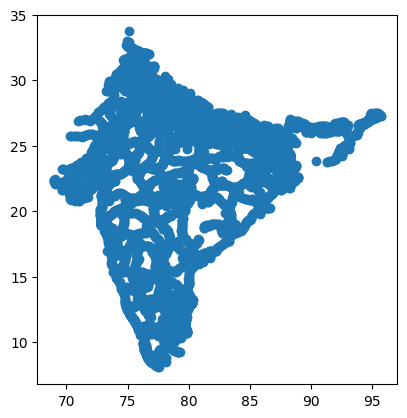

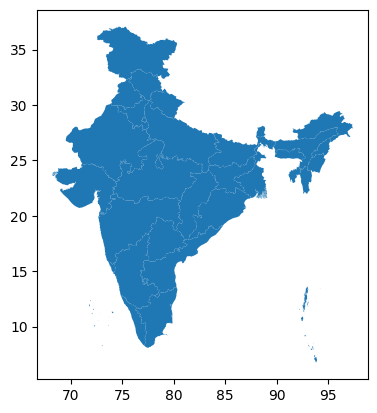

In [ ]:
stations_gdf.plot()
states_ind.plot()

In [ ]:
# Check validity of geometries
print("Invalid geometries in stations_gdf:", stations_gdf[~stations_gdf.is_valid])
print("Invalid geometries in states_ind:", states_ind[~states_ind.is_valid])

Invalid geometries in stations_gdf:      geometry state           code           name  zone address
1        None  None        XX-BECE        XX-BECE  None    None
2        None  None        XX-BSPY        XX-BSPY  None    None
3        None  None        YY-BPLC        YY-BPLC  None    None
25       None  None           BJUP           BJUP  None    None
29       None  None           CIKA           CIKA  None    None
...       ...   ...            ...            ...   ...     ...
8007     None  None           LCAB           LCAB  None    None
8025     None  None           BELG           BELG  None    None
8137     None  None           KANL           KANL  None    None
8276     None  None           YADA           YADA  None    None
8643     None  None  YAKUT PUR(YKA  YAKUT PUR(YKA  None    None

[293 rows x 6 columns]
Invalid geometries in states_ind:          st_nm                                           geometry
28  Tamil Nadu  MULTIPOLYGON (((78.19188 8.7273, 78.18996 8.72...


### EXPLORATORY DATA ANALYSIS

#### How many stations are there in each state?

In [ ]:
station_count = df_stations['st_nm'].value_counts()
station_count.head()

st_nm
Uttar Pradesh    1207
Maharashtra       724
Bihar             691
West Bengal       678
Rajasthan         626
Name: count, dtype: int64

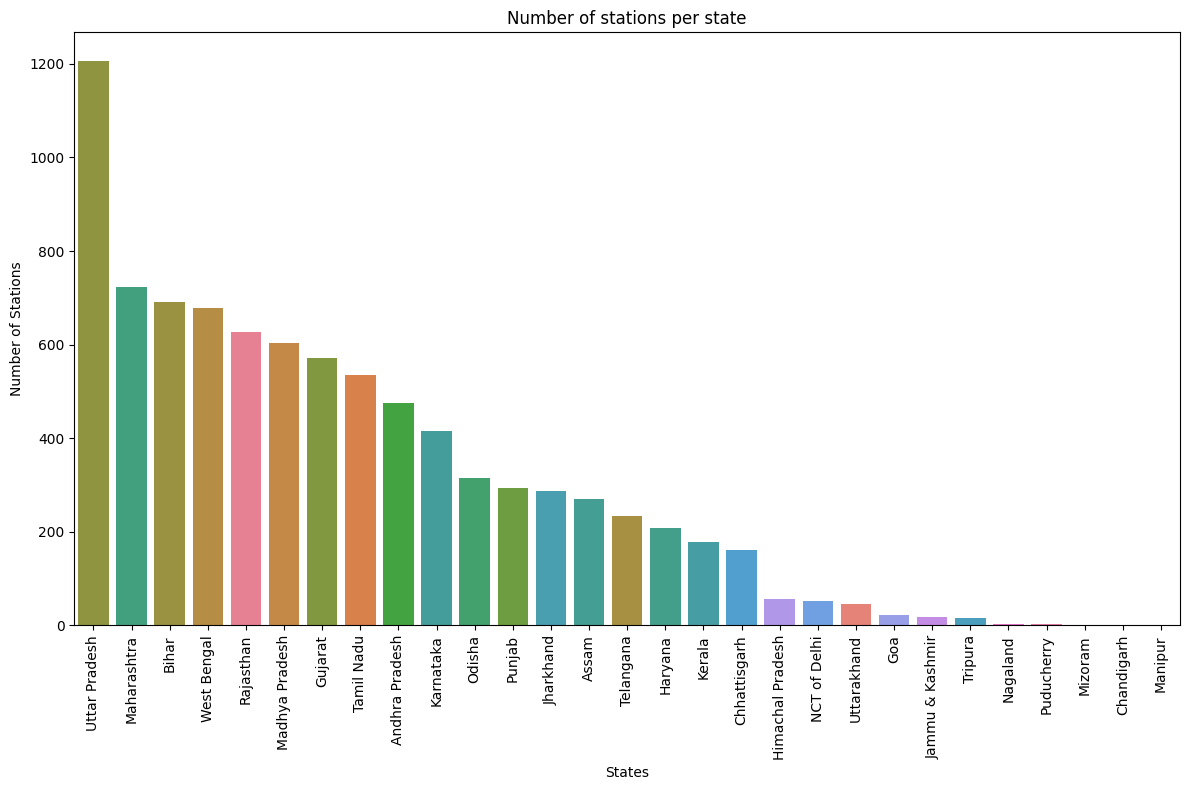

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_stations, x='st_nm', hue='st_nm', order=station_count.index)
plt.xlabel('States')
plt.ylabel('Number of Stations')
plt.title('Number of stations per state')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Remarks : Uttar Pradesh has the most number of stations in India

#### How many stations are there in each railway zone?

In [ ]:
station_count = df_stations['zone'].value_counts()
station_count

zone
NR      587
WR      446
NWR     417
SR      312
SCR     292
SWR     289
NER     259
NFR     256
ER      247
ECR     190
WCR     171
CR      159
NCR     156
SECR    144
SER     106
?        98
ECoR     74
KR       63
Name: count, dtype: int64

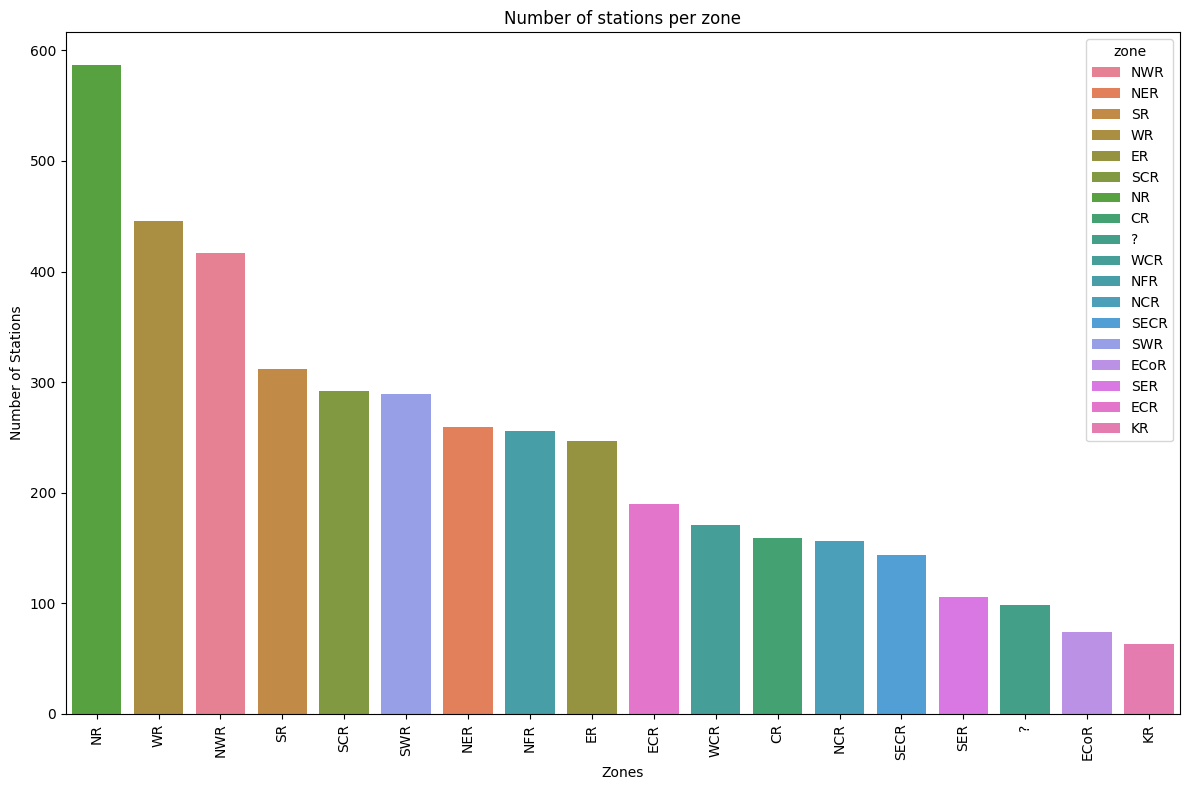

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_stations, x='zone', hue='zone', order=station_count.index)
plt.xlabel('Zones')
plt.ylabel('Number of Stations')
plt.title('Number of stations per zone')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Which stations have the highest number of train arrivals and departures?

In [ ]:
not_null_arrivals = schedules[schedules['arrival'] != 'None']
not_null_departure = schedules[schedules['departure'] != 'None']

In [ ]:
station_arrivals = not_null_arrivals.groupby('station_name').size().reset_index(name='arrivals_count')
station_departures = not_null_departure.groupby('station_name').size().reset_index(name='departures_count')

In [ ]:
arr = station_arrivals.sort_values(by='arrivals_count', ascending = False).head(10)
dep = station_departures.sort_values(by='departures_count', ascending = False).head(10)

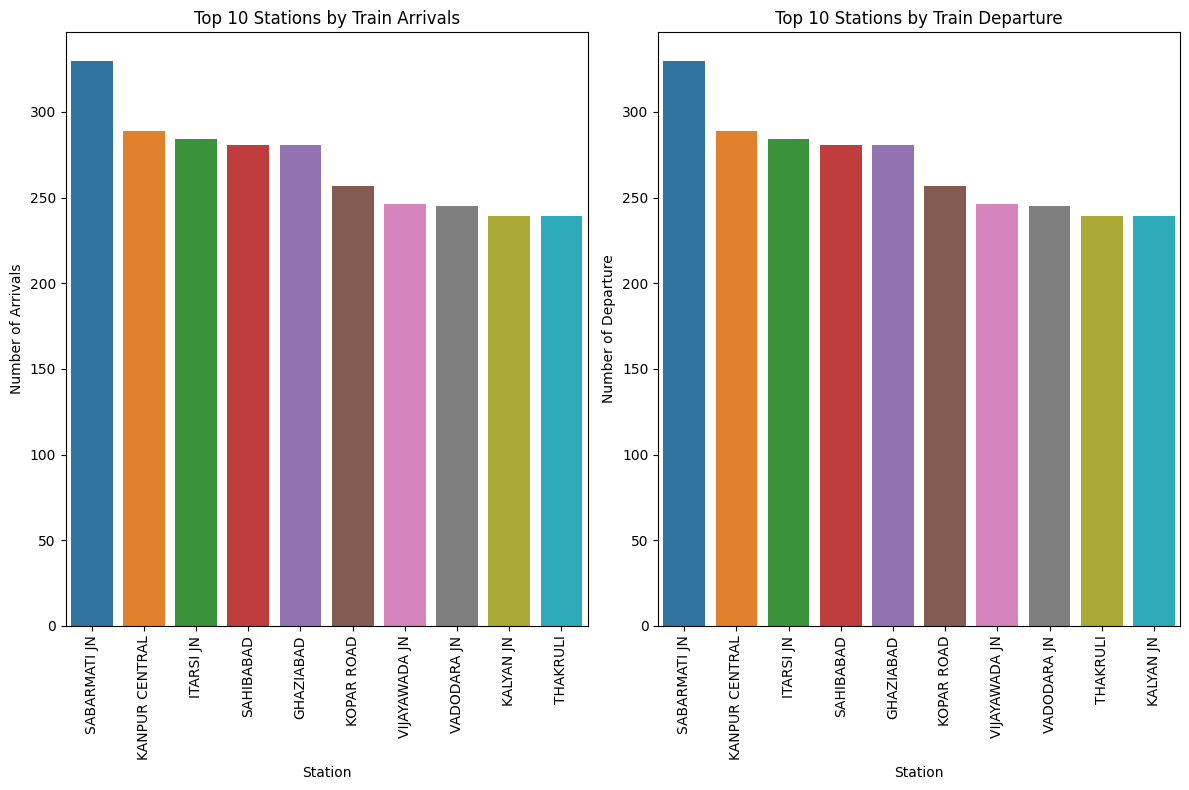

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.barplot(data=arr, x='station_name', y = 'arrivals_count',hue='station_name')
plt.xlabel('Station')
plt.ylabel('Number of Arrivals')
plt.title('Top 10 Stations by Train Arrivals')
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sns.barplot(data=dep, x='station_name', y = 'departures_count',hue='station_name')
plt.xlabel('Station')
plt.ylabel('Number of Departure')
plt.title('Top 10 Stations by Train Departure')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

#### How many trains offer each class of service (e.g., first class, second AC, sleeper, etc.)?

In [ ]:
classes = ['chair_car','sleeper','third_ac','second_ac','first_class','first_ac']

In [ ]:
for i in classes:
    print(f'Number of trains having {i} : {trains_gdf[trains_gdf[i] == 1].shape[0]}')

Number of trains having chair_car : 403
Number of trains having sleeper : 1759
Number of trains having third_ac : 1650
Number of trains having second_ac : 1417
Number of trains having first_class : 167
Number of trains having first_ac : 439


#### What are the different types of trains available?

In [ ]:
types = trains_gdf['type'].value_counts()

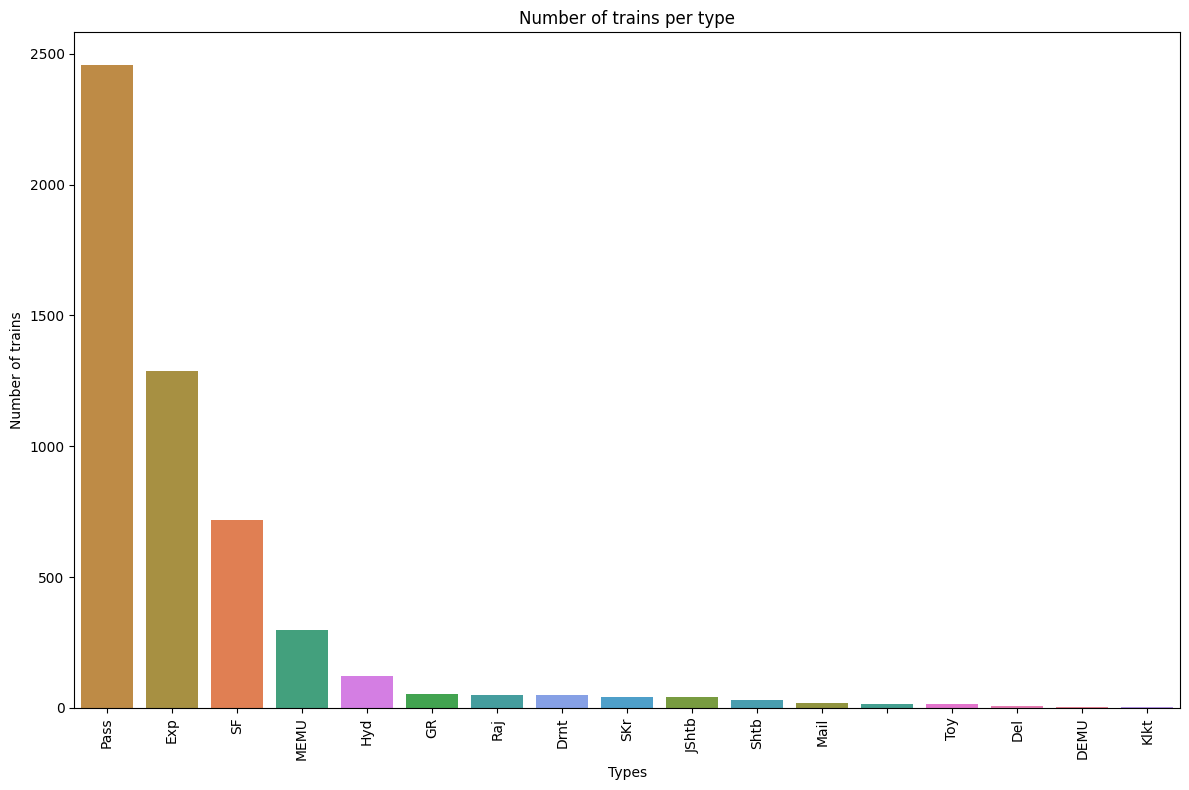

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=trains_gdf, x='type', hue='type', order=types.index)
plt.xlabel('Types')
plt.ylabel('Number of trains')
plt.title('Number of trains per type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Which stations serve the most trains?

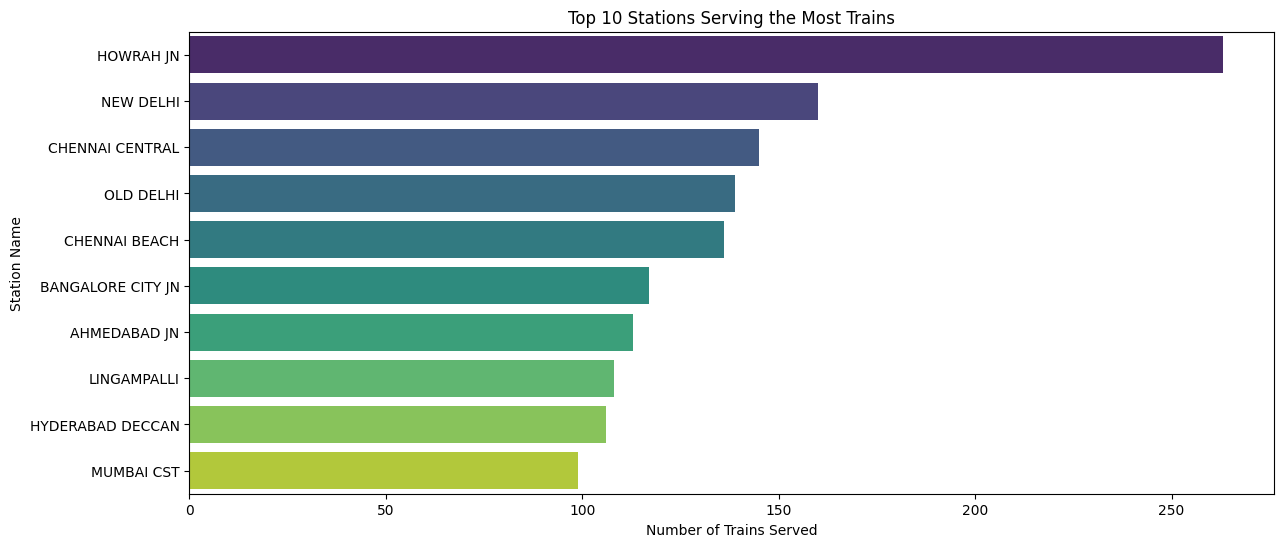

In [ ]:
departures = trains_gdf['from_station_name'].value_counts().reset_index(name='departures_count')
departures.rename(columns={'from_station_name': 'station_name'}, inplace=True)

arrivals = trains_gdf['to_station_name'].value_counts().reset_index(name='arrivals_count')
arrivals.rename(columns={'to_station_name': 'station_name'}, inplace=True)

station_counts = pd.merge(departures, arrivals, on='station_name',how='outer').fillna(0)

station_counts['total_trains'] = station_counts['departures_count'] + station_counts['arrivals_count']

top_stations = station_counts.sort_values(by='total_trains', ascending=False)

# Plot the top 10 stations serving the most trains
top_10_stations = top_stations.head(10)

plt.figure(figsize=(14, 6))
sns.barplot(data=top_10_stations, x='total_trains', y='station_name',hue = 'station_name',palette='viridis')
plt.title('Top 10 Stations Serving the Most Trains')
plt.xlabel('Number of Trains Served')
plt.ylabel('Station Name')
plt.show()

#### What are the most common routes (from_station_code to to_station_code)?

In [ ]:
routes = trains_gdf.groupby(['from_station_code','to_station_code']).size().reset_index(name='count')
most_common_routes = routes.sort_values(by='count', ascending=False)
most_common_routes.head(10)

from_station_code to_station_code  count
2225               MSB            VLCY     70
1965               LPI              FM     30
2222               MSB             TBM     29
1135                FM             LPI     28
1463               HYB             LPI     26
1966               LPI             HYB     23
1433               HWH             PKU     21
2569               PKU             HWH     16
2219               MSB             CGL     14
1174              GAYA            PNBE      9

In [ ]:
most_common_routes['route'] = most_common_routes['from_station_code'] + ' to ' + most_common_routes['to_station_code']
most_common_routes = most_common_routes.head(10)

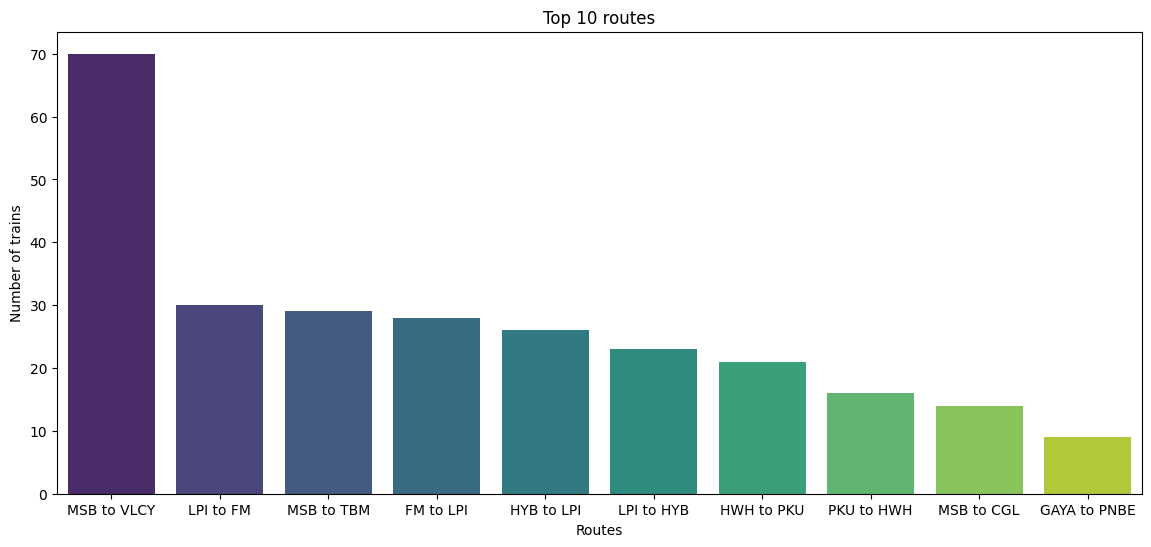

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(data=most_common_routes, x='route', y = 'count',hue = 'route',palette='viridis')
plt.title('Top 10 routes')
plt.xlabel('Routes')
plt.ylabel('Number of trains')
plt.show()

### GEO VISUALISATION

In [ ]:
import plotly.graph_objects as go

In [ ]:
def process_polygon(boundaries_gdf):
    boundary_lines = []

    for idx, row in boundaries_gdf.iterrows():
        geom = row['geometry']
        if geom.geom_type == 'Polygon':
            boundary_lines.append(go.Scattermapbox(
            mode="lines",
            lon=[coord[0] for coord in geom.exterior.coords],
            lat=[coord[1] for coord in geom.exterior.coords],
            name='ST_NM',
            showlegend=False,
            line=dict(color='black'),
        ))
        if geom.geom_type == 'MultiPolygon':
            for poly in geom.geoms:
                boundary_lines.append(go.Scattermapbox(
                mode="lines",
                lon=[coord[0] for coord in poly.exterior.coords],
                lat=[coord[1] for coord in poly.exterior.coords],
                name='ST_NM',
                showlegend=False,
                line=dict(color='black'),

                ))
    return boundary_lines

In [ ]:
def process_station_points(stations_gdf):
    station_points = go.Scattermapbox(
        mode="markers",
        lon=stations_gdf.geometry.x,
        lat=stations_gdf.geometry.y,
        marker=dict(size=4, color='blue'),
        text=stations_gdf['name'],
        name='name',
        showlegend=False
    )

    return station_points

In [ ]:
def plot_stations(stations_gdf, state_name=None):

    clat = 24
    clon = 80
    zoom = 4
    title = 'India'

    boundaries_gdf = states_ind

    if state_name:
        all_states = list(states_ind['st_nm'].unique())

        if state_name in all_states:
            boundaries_gdf = states_ind[states_ind['st_nm'] == state_name]
            stations_gdf = stations_gdf[stations_gdf['st_nm'] == state_name]

            clat = stations_gdf.geometry.y.mean()
            clon = stations_gdf.geometry.x.mean()
            zoom = 6
            title = state_name
        else:
            return '`state_name` not matching with the records.'

    boundary_lines = process_polygon(boundaries_gdf)
    station_points = process_station_points(stations_gdf)

    fig = go.Figure(boundary_lines + [station_points])

    fig.update_layout(
        mapbox_style="carto-positron",
        mapbox=dict(
            center=dict(lat=clat, lon=clon),
            zoom=6
        ),
        title=title,
        margin={"r":0,"t":40,"l":0,"b":0},
    )

    fig.show()

plot_stations(df_stations,'West Bengal')

### Some Observations

- Uttar Pradesh has the most number of stations
- Most stations are served by Northen Railway
- Passenger train type is the most common train types.
- Howrah Junction serves most trains based on Arrival and departure
- MSB is the most common departure station
- VLCY is the most common arrival station